In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error
from xgboost import XGBRegressor
import plotly.express as px
import shap

In [22]:
df = pd.read_csv("/content/Sales Prediction.csv")

In [23]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [24]:
#create the input data and the data that will be used for prediction
X = df[['TV', 'Radio', 'Newspaper']]
Y = df.Sales

Mean Squared Error: 0.621220182807245
R-squared: 0.9780343013434973


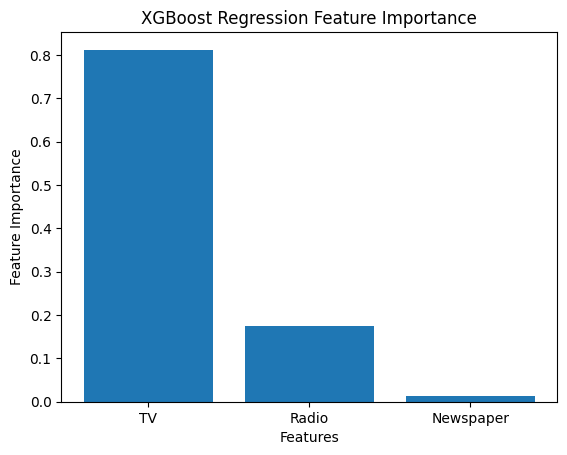

In [25]:
accuracy_results = {}
#function to find the most optimal setting
for i in range (1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)

    xgb_model = XGBRegressor(objective='reg:squarederror', random_state=1)
    xgb_model.fit(X_train, Y_train)

    Y_pred = xgb_model.predict(X_test)

    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    feature_importances = xgb_model.feature_importances_
    feature_names = X.columns
    accuracy_results[i] = r2

sorted_results = sorted(accuracy_results.items(), key=lambda x: x[1], reverse=True)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=(sorted_results[0][0]))

# Create and train the XGBoost regression model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=1)
xgb_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Note: XGBoost provides feature importance, which can be visualized.
feature_importances = xgb_model.feature_importances_
feature_names = X.columns

# Plotting feature importances
plt.bar(feature_names, feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('XGBoost Regression Feature Importance')
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[17:30:58] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



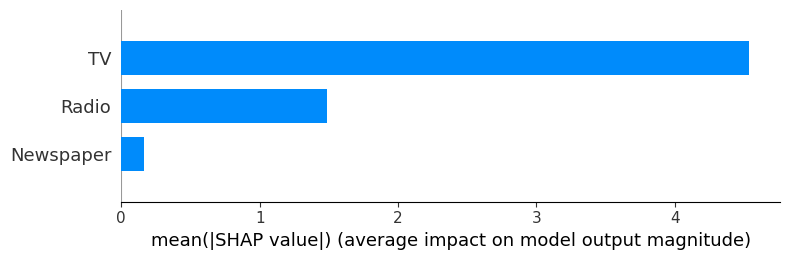

In [26]:
# SHAP values for explaining the output of the model
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary plot with Plotly
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar")


In [28]:
#creatign an interactive matrix
top_features = 10
top_feature_indices = np.argsort(np.abs(shap_values.mean(0)))[-top_features:]
top_feature_names = X.columns[top_feature_indices]

fig = px.scatter_matrix(X_test, dimensions=top_feature_names, color=Y_test,
                        labels={'color': 'Sales'}, title='Interactive Scatter Matrix for Top Features')
fig.show()

In [29]:
def predict_sales(tv_spent, radio_spent, newspaper_spent):
    # Prepare input data as a 2D array
    input_data = [[tv_spent, radio_spent, newspaper_spent]]

    # Make the prediction
    predicted_sales = xgb_model.predict(input_data)

    return predicted_sales[0]

def predictor():
    # Get inputs for TV, radio, and newspaper ad spending
    tv_spent = float(input("Enter TV ad spent: "))
    radio_spent = float(input("Enter Radio ad spent: "))
    newspaper_spent = float(input("Enter Newspaper ad spent: "))

    # Predict sales using the trained model
    predicted_sales = predict_sales(tv_spent, radio_spent, newspaper_spent)

    print(f"Predicted Sales: {predicted_sales:.2f}")

In [32]:
predictor()

Enter TV ad spent: 250
Enter Radio ad spent: 90
Enter Newspaper ad spent: 120
Predicted Sales: 25.80
